#UFC Prediction Project



In [1]:
from IPython.core.display import display, HTML

# adjust output cell width
display(HTML("""
<style>
.output_subarea {
    max-width: 50% !important; /* Set the width to half the screen */
    margin: 0 auto;            /* Center the output */
}
</style>
"""))

In [2]:
# this command installs the kagglehub library, which provides easy access to datasets on Kaggle.
!pip install kagglehub

In [3]:
# downloading the dataset from kaggle
import kagglehub

path = kagglehub.dataset_download("maksbasher/ufc-complete-dataset-all-events-1996-2024")
print("path is", path)

path is /root/.cache/kagglehub/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024/versions/6


In [4]:
import os

# define the directory path where the dataset is stored
dir_path = "/root/.cache/kagglehub/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024/versions/6"

# create the full path to the UFC dataset folder
ufc_dataset_path = os.path.join(dir_path, "UFC dataset")

# check if the specified path is a valid directory and list its contents
if os.path.isdir(ufc_dataset_path):
    print("Contents of UFC dataset directory:", os.listdir(ufc_dataset_path))
else:
    print("UFC dataset is not a directory or does not exist.")

Contents of UFC dataset directory: ['Urls', 'Small set', 'Large set', 'Fighter stats', 'Medium set']


In [5]:
import os

# define the directory path where the dataset is stored
ufc_dataset_path = "/root/.cache/kagglehub/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024/versions/6/UFC dataset"

# iterate through all files and subdirectories in the dataset directory
for sub_dir in os.listdir(ufc_dataset_path):
    sub_dir_path = os.path.join(ufc_dataset_path, sub_dir)
    if os.path.isdir(sub_dir_path):
        print(f"Contents of '{sub_dir}':", os.listdir(sub_dir_path))
    else:
        print(f"File: {sub_dir}")

Contents of 'Urls': ['event_urls.txt', 'fighter_urls.txt', 'fight_urls.txt']
Contents of 'Small set': ['upcoming_events_small.csv', 'completed_events_small.csv']
Contents of 'Large set': ['large_dataset.csv']
Contents of 'Fighter stats': ['fighter_stats.csv', 'fighters_stats.txt']
Contents of 'Medium set': ['medium_dataset.csv']


In [6]:
# to load the fighter statistics data from the fighter_stats.csv file into a pandas dataframe for analysis.
csv_file_path = os.path.join(ufc_dataset_path, "Fighter stats", "fighter_stats.csv")

import pandas as pd
fighter_stats = pd.read_csv(csv_file_path)
print(fighter_stats.head())

               name  wins  losses  height  weight   reach    stance   age  \
0      Amanda Ribas  12.0     5.0  160.02   56.70  167.64  Orthodox  30.0   
1    Rose Namajunas  13.0     6.0  165.10   56.70  165.10  Orthodox  31.0   
2     Karl Williams  10.0     1.0  190.50  106.59  200.66  Orthodox  34.0   
3       Justin Tafa   7.0     4.0  182.88  119.75  187.96  Southpaw  30.0   
4  Edmen Shahbazyan  13.0     4.0  187.96   83.91  190.50  Orthodox  26.0   

   SLpM  sig_str_acc  SApM  str_def  td_avg  td_acc  td_def  sub_avg  
0  4.63         0.40  3.40     0.61    2.07    0.51    0.85      0.7  
1  3.69         0.41  3.51     0.63    1.38    0.47    0.59      0.5  
2  2.87         0.52  1.70     0.60    4.75    0.50    1.00      0.2  
3  4.09         0.54  5.02     0.47    0.00    0.00    0.50      0.0  
4  3.60         0.52  4.09     0.45    2.24    0.38    0.63      0.6  


In [7]:
# to load the fight-level dataset from large_dataset.csv into a Pandas DataFrame for further exploration, preprocessing, and modeling.
csv_file_path = os.path.join(ufc_dataset_path, "Large set", "large_dataset.csv")  # Adjust subdirectory if needed

import pandas as pd
master_ufc = pd.read_csv(csv_file_path)
print(master_ufc.head())

                             event_name          r_fighter        b_fighter  \
0  UFC Fight Night: Ribas vs. Namajunas       Amanda Ribas   Rose Namajunas   
1  UFC Fight Night: Ribas vs. Namajunas      Karl Williams      Justin Tafa   
2  UFC Fight Night: Ribas vs. Namajunas   Edmen Shahbazyan        AJ Dobson   
3  UFC Fight Night: Ribas vs. Namajunas     Payton Talbott  Cameron Saaiman   
4  UFC Fight Night: Ribas vs. Namajunas  Billy Quarantillo    Youssef Zalal   

  winner       weight_class  is_title_bout gender                method  \
0   Blue  Women's Flyweight              0  Women  Decision - Unanimous   
1    Red        Heavyweight              0    Men  Decision - Unanimous   
2    Red       Middleweight              0    Men                KO/TKO   
3    Red       Bantamweight              0    Men                KO/TKO   
4   Blue      Featherweight              0    Men            Submission   

   finish_round  total_rounds  ...  weight_diff reach_diff  SLpM_total_dif

In [8]:
# dropped columns such as event_name and referee because they are not necessary in our prediction model, they have unsigfincant value.
columns_to_drop = ['event_name', 'referee']
master_ufc.drop(columns=columns_to_drop, inplace=True)

print(master_ufc.columns)

Index(['r_fighter', 'b_fighter', 'winner', 'weight_class', 'is_title_bout',
       'gender', 'method', 'finish_round', 'total_rounds', 'time_sec', 'r_kd',
       'r_sig_str', 'r_sig_str_att', 'r_sig_str_acc', 'r_str', 'r_str_att',
       'r_str_acc', 'r_td', 'r_td_att', 'r_td_acc', 'r_sub_att', 'r_rev',
       'r_ctrl_sec', 'r_wins_total', 'r_losses_total', 'r_age', 'r_height',
       'r_weight', 'r_reach', 'r_stance', 'r_SLpM_total', 'r_SApM_total',
       'r_sig_str_acc_total', 'r_td_acc_total', 'r_str_def_total',
       'r_td_def_total', 'r_sub_avg', 'r_td_avg', 'b_kd', 'b_sig_str',
       'b_sig_str_att', 'b_sig_str_acc', 'b_str', 'b_str_att', 'b_str_acc',
       'b_td', 'b_td_att', 'b_td_acc', 'b_sub_att', 'b_rev', 'b_ctrl_sec',
       'b_wins_total', 'b_losses_total', 'b_age', 'b_height', 'b_weight',
       'b_reach', 'b_stance', 'b_SLpM_total', 'b_SApM_total',
       'b_sig_str_acc_total', 'b_td_acc_total', 'b_str_def_total',
       'b_td_def_total', 'b_sub_avg', 'b_td_avg', 'kd

In [9]:
# checking for columns that have missing values
missing_columns = master_ufc.columns[master_ufc.isnull().sum() > 0]
print("Columns with missing values:", missing_columns)

Columns with missing values: Index(['total_rounds', 'r_age', 'r_reach', 'r_stance', 'b_age', 'b_reach',
       'b_stance', 'age_diff', 'reach_diff'],
      dtype='object')


In [10]:
# the dataset master_ufc has 93 features
print("Number of columns:", master_ufc.shape[1])

Number of columns: 93


In [11]:
# removing duplicated columns
master_ufc = master_ufc.loc[:, ~master_ufc.columns.duplicated()]

In [12]:
# calculate the number of NaN values in each column
nan_counts = master_ufc.isnull().sum()

# filter columns that have one or more missing values
nan_columns = nan_counts[nan_counts > 0]

# print columns with missing values and their counts
print("Columns with NaN values and their counts:")
print(nan_columns)

Columns with NaN values and their counts:
total_rounds      31
r_age             76
r_reach          412
r_stance          26
b_age            190
b_reach          888
b_stance          68
age_diff         213
reach_diff      1038
dtype: int64


In [13]:
# merge fighter statistics for red corner fighters
master_ufc = master_ufc.merge(
    fighter_stats,           # Fighter stats dataset
    left_on="r_fighter",     # Match red corner fighter name
    right_on="name",         # Match fighter stats 'name' column
    how="left"               # Left join to keep all rows from master_ufc
)

# rename the columns from fighter_stats to distinguish red corner stats
master_ufc = master_ufc.rename(columns={col: f"r_{col}" for col in fighter_stats.columns if col != "name"})

# merge fighter statistics for blue corner fighters
master_ufc = master_ufc.merge(
    fighter_stats,           # Fighter stats dataset
    left_on="b_fighter",     # Match blue corner fighter name
    right_on="name",         # Match fighter stats 'name' column
    how="left"               # Left join to keep all rows from master_ufc
)

# rename the columns from fighter_stats to distinguish blue corner stats
master_ufc = master_ufc.rename(columns={col: f"b_{col}" for col in fighter_stats.columns if col != "name"})


In [14]:
# removed duplicated columns
master_ufc = master_ufc.loc[:, ~master_ufc.columns.duplicated()]


In [15]:
# removed unnecessary columns
master_ufc = master_ufc.drop(columns=['name_x', 'name_y'])

print("Updated columns:", master_ufc.columns)

Updated columns: Index(['r_fighter', 'b_fighter', 'winner', 'weight_class', 'is_title_bout',
       'gender', 'method', 'finish_round', 'total_rounds', 'time_sec',
       ...
       'r_SLpM', 'r_SApM', 'r_str_def', 'r_td_def', 'b_wins', 'b_losses',
       'b_SLpM', 'b_SApM', 'b_str_def', 'b_td_def'],
      dtype='object', length=105)


In [16]:
# calculate the total number of missing values in each column of the DataFrame
nan_counts = master_ufc.isnull().sum()

# filter columns with more than 0 missing values
nan_columns = nan_counts[nan_counts > 0]

print("Columns with NaN values and their counts:")
print(nan_columns)


Columns with NaN values and their counts:
total_rounds      33
r_age             81
r_reach          420
r_stance          28
b_age            200
b_reach          898
b_stance          72
age_diff         223
reach_diff      1048
dtype: int64


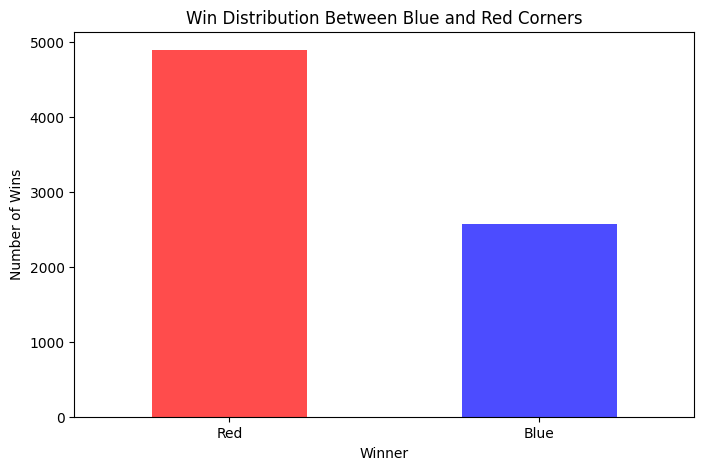

In [17]:
# import the matplotlib library
import matplotlib.pyplot as plt

# size
plt.figure(figsize=(8, 5))

# plot a bar chart for the 'winner' column value counts
# 'color' specifies Red and Blue for each category, 'alpha' adds transparency
master_ufc['winner'].value_counts().plot(kind='bar', color=['red', 'blue'], alpha=0.7)

plt.title('Win Distribution Between Blue and Red Corners')
plt.xlabel('Winner')
plt.ylabel('Number of Wins')
plt.xticks(rotation=0)
plt.show()

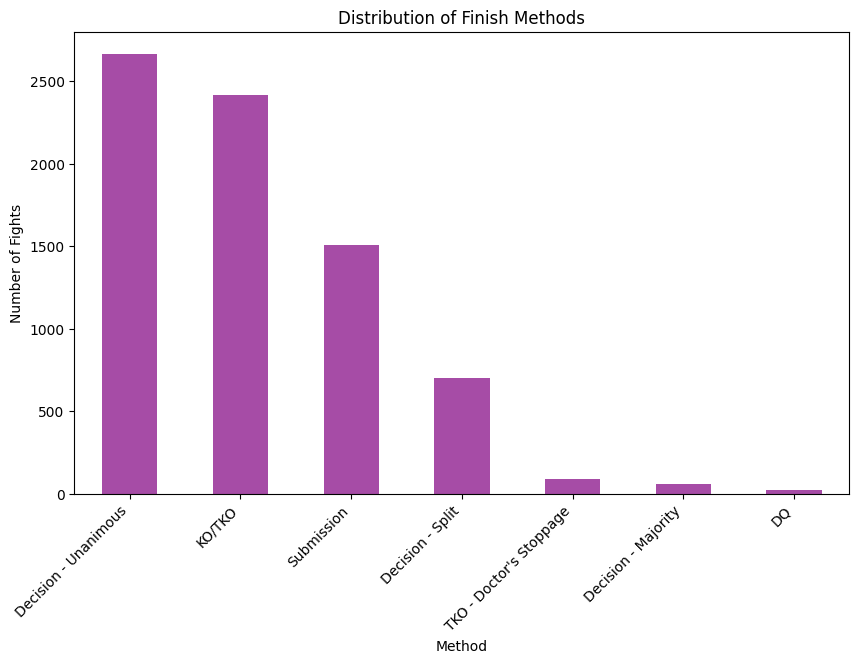

In [18]:
plt.figure(figsize=(10, 6))

# plot the distribution of the 'method' column as a bar chart
master_ufc['method'].value_counts().plot(kind='bar', color='purple', alpha=0.7)

plt.title('Distribution of Finish Methods')
plt.xlabel('Method')
plt.ylabel('Number of Fights')

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


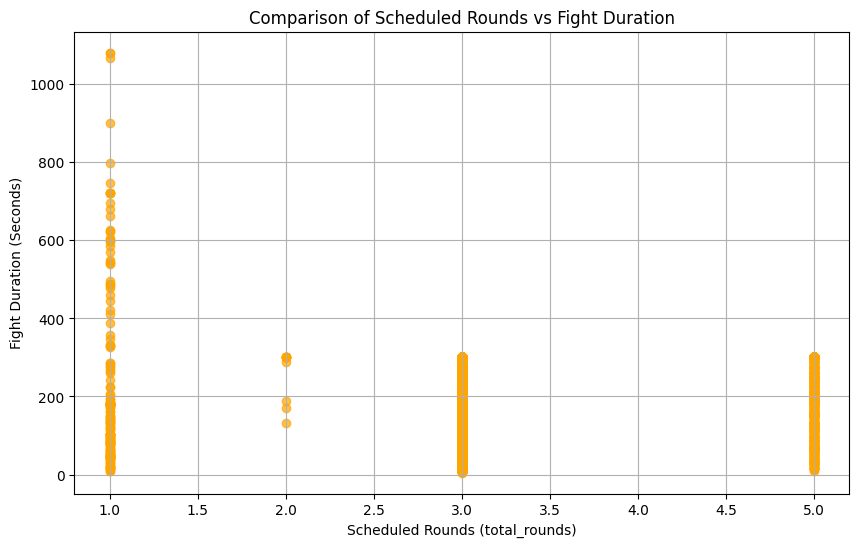

In [19]:
plt.figure(figsize=(10, 6))

# Create a scatter plot to compare scheduled rounds and fight duration
plt.scatter(master_ufc['total_rounds'], master_ufc['time_sec'], alpha=0.7, color='orange')

# Add a title and axis labels for context
plt.title('Comparison of Scheduled Rounds vs Fight Duration')
plt.xlabel('Scheduled Rounds (total_rounds)')
plt.ylabel('Fight Duration (Seconds)')

plt.grid(True)

plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pandas as pd

def predict_missing_numeric_values(df, target_column, exclude_columns):
    """
    Predict missing numeric values for a specific column using Random Forest Regressor.
    """
    known_data = df[~df[target_column].isnull()]
    unknown_data = df[df[target_column].isnull()]

    if unknown_data.empty:
        print(f"No missing values to predict for {target_column}")
        return df

    # prepare training and prediction data
    X_train = known_data.drop(columns=exclude_columns)
    y_train = known_data[target_column]
    X_unknown = unknown_data.drop(columns=exclude_columns)

    # convert categorical features to numerical using dummy encoding
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_unknown = pd.get_dummies(X_unknown, drop_first=True)

    # align columns to ensure matching structure
    X_unknown = X_unknown.reindex(columns=X_train.columns, fill_value=0)

    # train Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # predict missing values and update the dataframe
    predictions = model.predict(X_unknown)
    df.loc[df[target_column].isnull(), target_column] = predictions

    return df


def predict_missing_categorical_values(df, target_column, exclude_columns):
    """
    Predict missing categorical values using Random Forest Classifier.
    """
    known_data = df[~df[target_column].isnull()]
    unknown_data = df[df[target_column].isnull()]

    if unknown_data.empty:
        print(f"No missing values to predict for {target_column}")
        return df

    # prepare training and prediction data
    X_train = known_data.drop(columns=exclude_columns)
    y_train = known_data[target_column]
    X_unknown = unknown_data.drop(columns=exclude_columns)

    # convert categorical features to numerical using dummy encoding
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_unknown = pd.get_dummies(X_unknown, drop_first=True)

    # align columns to ensure matching structure
    X_unknown = X_unknown.reindex(columns=X_train.columns, fill_value=0)

    # train Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # predict missing values and update the DataFrame
    predictions = model.predict(X_unknown)
    df.loc[df[target_column].isnull(), target_column] = predictions

    return df


# define numeric and categorical columns with missing values
numeric_columns = [
    'total_rounds', 'r_age', 'r_reach', 'b_age', 'b_reach', 'age_diff',
    'reach_diff'
]

categorical_columns = [
    'r_stance', 'b_stance',
]

# predict and fill missing values for numeric columns
for column in numeric_columns:
    print(f"Predicting missing values for numeric column: {column}")
    master_ufc = predict_missing_numeric_values(
        master_ufc,
        target_column=column,
        exclude_columns=['r_fighter', 'b_fighter', 'winner', column]
    )

print("Remaining missing values in numeric columns:")
print(master_ufc[numeric_columns].isnull().sum())

# predict and fill missing values for categorical columns
for column in categorical_columns:
    print(f"Predicting missing values for categorical column: {column}")
    master_ufc = predict_missing_categorical_values(
        master_ufc,
        target_column=column,
        exclude_columns=['r_fighter', 'b_fighter', 'winner', column]
    )

print("Remaining missing values in categorical columns:")
print(master_ufc[categorical_columns].isnull().sum())

Predicting missing values for numeric column: total_rounds
Predicting missing values for numeric column: r_age
Predicting missing values for numeric column: r_reach
Predicting missing values for numeric column: b_age
Predicting missing values for numeric column: b_reach
Predicting missing values for numeric column: age_diff
Predicting missing values for numeric column: reach_diff
Remaining missing values in numeric columns:
total_rounds    0
r_age           0
r_reach         0
b_age           0
b_reach         0
age_diff        0
reach_diff      0
dtype: int64
Predicting missing values for categorical column: r_stance
Predicting missing values for categorical column: b_stance
Remaining missing values in categorical columns:
r_stance    0
b_stance    0
dtype: int64


In [21]:
# downloading the dataset for the upcoming fights
path = kagglehub.dataset_download("jaredcarmona/upcomingdatasetproject")
print("path is", path)

path is /root/.cache/kagglehub/datasets/jaredcarmona/upcomingdatasetproject/versions/1


In [22]:
import os

# define the path to the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/jaredcarmona/upcomingdatasetproject/versions/1"

# list and print all files and directories in the specified dataset path
print("Files in the dataset directory:", os.listdir(dataset_path))


Files in the dataset directory: ['upcomingproject382.csv']


In [23]:
dataset_file = os.path.join(dataset_path, "upcomingproject382.csv")  # construct the file path

# read the CSV file into a into a pandas dataframe
upcoming_fights = pd.read_csv(dataset_file, encoding='latin1')

# display the contents of the DataFrame
upcoming_fights


,r_fighter,b_fighter
0,Erin Blanchfield,Manon Fiorot
1,Vicente Luque,Joaquin Buckley
2,Chris Weidman,Bruno Silva
3,Nursulton Ruziboev,Sedriques Dumas
4,Bill Algeo,Kyle Nelson
...,...,...
377,Sean Woodson,Fernando Padilla
378,Miles Johns,Felipe Lima
379,Miranda Maverick,Jamey-Lyn Horth
380,Davey Grant,Ramon Tavares


In [24]:
master_ufc.head() # showing the head of the whole dataset of historical fights

,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,time_sec,...,r_SLpM,r_SApM,r_str_def,r_td_def,b_wins,b_losses,b_SLpM,b_SApM,b_str_def,b_td_def
0,Amanda Ribas,Rose Namajunas,Blue,Women's Flyweight,0,Women,Decision - Unanimous,5,5.0,300,...,4.63,3.40,0.61,0.85,13.0,6.0,3.69,3.51,0.63,0.59
1,Karl Williams,Justin Tafa,Red,Heavyweight,0,Men,Decision - Unanimous,3,3.0,300,...,2.87,1.70,0.60,1.00,7.0,4.0,4.09,5.02,0.47,0.50
2,Edmen Shahbazyan,AJ Dobson,Red,Middleweight,0,Men,KO/TKO,1,3.0,273,...,3.60,4.09,0.45,0.63,7.0,3.0,4.29,5.31,0.46,0.65
3,Payton Talbott,Cameron Saaiman,Red,Bantamweight,0,Men,KO/TKO,2,3.0,21,...,8.05,3.58,0.51,0.90,9.0,2.0,5.32,4.18,0.51,0.47
4,Billy Quarantillo,Youssef Zalal,Blue,Featherweight,0,Men,Submission,2,3.0,110,...,7.36,5.57,0.43,0.61,14.0,5.0,2.88,1.73,0.65,0.60


In [25]:
upcoming_fights.head() # showing the head of the whole dataset of  upcoming fights

,r_fighter,b_fighter
0,Erin Blanchfield,Manon Fiorot
1,Vicente Luque,Joaquin Buckley
2,Chris Weidman,Bruno Silva
3,Nursulton Ruziboev,Sedriques Dumas
4,Bill Algeo,Kyle Nelson


In [26]:
import pandas as pd

def align_and_combine(master_ufc, upcoming_fights):
    """
    Aligns the upcoming fights dataset with the master UFC dataset structure
    and combines them into a single DataFrame.

    Parameters:
    ----------
    master_ufc : pd.DataFrame
        The historical UFC dataset containing fight records and fighter statistics.
    upcoming_fights : pd.DataFrame
        The dataset containing upcoming fights information.

    Returns:
    -------
    combined_dataset : pd.DataFrame
        A DataFrame combining both historical and upcoming fight data.
    """
    # create an empty DataFrame with the same columns as master_ufc
    aligned_upcoming = pd.DataFrame(columns=master_ufc.columns)

    # fill 'r_fighter' and 'b_fighter' columns with values from the upcoming fights dataset
    aligned_upcoming[['r_fighter', 'b_fighter']] = upcoming_fights[['r_fighter', 'b_fighter']]

    # concatenate the historical data and upcoming fight data into a single dataset
    combined_dataset = pd.concat([master_ufc, aligned_upcoming], axis=0, ignore_index=True)

    return combined_dataset

# combine historical UFC dataset with upcoming fights
ufc_combined = align_and_combine(master_ufc, upcoming_fights)

# print the last rows of the combined dataset to see the merge
print("Combined UFC Dataset:")
print(ufc_combined.tail())


Combined UFC Dataset:
              r_fighter         b_fighter winner weight_class is_title_bout  \
7841       Sean Woodson  Fernando Padilla    NaN          NaN           NaN   
7842        Miles Johns       Felipe Lima    NaN          NaN           NaN   
7843   Miranda Maverick   Jamey-Lyn Horth    NaN          NaN           NaN   
7844        Davey Grant     Ramon Tavares    NaN          NaN           NaN   
7845  Josefine Knutsson   Piera Rodriguez    NaN          NaN           NaN   

     gender method finish_round  total_rounds time_sec  ... r_SLpM r_SApM  \
7841    NaN    NaN          NaN           NaN      NaN  ...    NaN    NaN   
7842    NaN    NaN          NaN           NaN      NaN  ...    NaN    NaN   
7843    NaN    NaN          NaN           NaN      NaN  ...    NaN    NaN   
7844    NaN    NaN          NaN           NaN      NaN  ...    NaN    NaN   
7845    NaN    NaN          NaN           NaN      NaN  ...    NaN    NaN   

     r_str_def  r_td_def b_wins b_losses

<ipython-input-26-fb5c46e152ff>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataset = pd.concat([master_ufc, aligned_upcoming], axis=0, ignore_index=True)


In [27]:
import pandas as pd

def fill_fighter_stats(combined_df, exclude_columns):
    """
    Fills NaN values for numeric and non-numeric stats of fighters
    in the upcoming fights using their historical values from past fights.

    Parameters:
    ----------
    combined_df : pd.DataFrame
        The combined dataset containing both historical and upcoming fight data.
    exclude_columns : list
        A list of columns to exclude from the filling process.

    Returns:
    -------
    pd.DataFrame
        The updated DataFrame with missing fighter statistics filled using historical values.
    """
    for role in ['r', 'b']:
        fighter_col = f"{role}_fighter"  # column indicating fighter names

        # identify relevant stats columns for the given fighter role
        stats_columns = [
            col for col in combined_df.columns
            if col.startswith(role) and col not in exclude_columns
        ]

        # separate columns into numeric and non-numeric stats
        non_numeric_columns = [col for col in stats_columns if combined_df[col].dtype == 'object']
        non_numeric_columns.extend(['weight_class', 'is_title_bout', 'gender'])  # additional non-numeric columns
        numeric_columns = [col for col in stats_columns if col not in non_numeric_columns]
        numeric_columns.append('total_rounds')  # include 'total_rounds' as a numeric column

        # fill missing numeric stats with the mean value from past fights
        for stat_col in numeric_columns:
            combined_df[stat_col] = combined_df.apply(
                lambda row: combined_df.loc[
                    (combined_df[fighter_col] == row[fighter_col]) &
                    (~combined_df[stat_col].isna()), stat_col
                ].mean() if pd.isna(row[stat_col]) else row[stat_col], axis=1
            )

        # fill missing non-numeric stats with the most common value from past fights
        for stat_col in non_numeric_columns:
            combined_df[stat_col] = combined_df.apply(
                lambda row: (
                    combined_df.loc[
                        (combined_df[fighter_col] == row[fighter_col]) &
                        (~combined_df[stat_col].isna()), stat_col
                    ].value_counts().idxmax()
                    if not combined_df.loc[
                        (combined_df[fighter_col] == row[fighter_col]) &
                        (~combined_df[stat_col].isna()), stat_col
                    ].empty else None
                ) if pd.isna(row[stat_col]) else row[stat_col], axis=1
            )

    return combined_df

# columns to exclude from the filling process
exclude_columns = ['winner', 'time_sec', 'b_td', 'r_td', 'r_sig_str', 'b_sig_str']

# fill missing fighter statistics using historical data
ufc_combined_filled = fill_fighter_stats(ufc_combined, exclude_columns)


In [28]:
print(ufc_combined_filled.tail())

              r_fighter         b_fighter winner         weight_class  \
7841       Sean Woodson  Fernando Padilla    NaN        Featherweight   
7842        Miles Johns       Felipe Lima    NaN         Bantamweight   
7843   Miranda Maverick   Jamey-Lyn Horth    NaN    Women's Flyweight   
7844        Davey Grant     Ramon Tavares    NaN         Bantamweight   
7845  Josefine Knutsson   Piera Rodriguez    NaN  Women's Strawweight   

      is_title_bout gender method finish_round  total_rounds time_sec  ...  \
7841            0.0    Men    NaN          NaN           3.0      NaN  ...   
7842            0.0    Men    NaN          NaN           3.0      NaN  ...   
7843            0.0  Women    NaN          NaN           3.0      NaN  ...   
7844            0.0    Men    NaN          NaN           3.0      NaN  ...   
7845            0.0  Women    NaN          NaN           3.0      NaN  ...   

      r_SLpM r_SApM  r_str_def  r_td_def  b_wins  b_losses  b_SLpM b_SApM  \
7841    5.40   

In [29]:
# define columns where NaN values are allowed
allowed_nan_columns = [
    'winner', 'finish_round', 'time_sec', 'b_td', 'r_td', 'r_sig_str', 'b_sig_str', 'method'
]

# identify fighter-specific statistic columns that are not in the allowed NaN list, this happens
# due to special fighters having weird characters in their name we just avoiding for simplicity
fighter_stats_columns = [
    col for col in ufc_combined_filled.columns
    if (col.startswith('r_') or col.startswith('b_')) and col not in allowed_nan_columns
]

# drop rows where any fighter stats or gender columns have missing values
ufc_cleaned = ufc_combined_filled.dropna(
    subset=['gender'] + fighter_stats_columns,
    how='any'
)

print("Cleaned Dataset:")
from IPython.display import display
display(ufc_cleaned.tail())

Cleaned Dataset:


,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,time_sec,...,r_SLpM,r_SApM,r_str_def,r_td_def,b_wins,b_losses,b_SLpM,b_SApM,b_str_def,b_td_def
7839,Michael Johnson,Ottman Azaitar,NaN,Lightweight,0.0,Men,NaN,NaN,3.105263,NaN,...,4.27,3.83,0.57,0.81,13.0,2.0,5.73,4.96,0.48,1.00
7840,Joel Alvarez,Drakkar Klose,NaN,Lightweight,0.0,Men,NaN,NaN,3.000000,NaN,...,3.65,3.37,0.50,0.11,14.0,2.0,4.33,3.40,0.52,0.68
7841,Sean Woodson,Fernando Padilla,NaN,Featherweight,0.0,Men,NaN,NaN,3.000000,NaN,...,5.40,4.00,0.58,0.84,16.0,5.0,6.48,5.25,0.53,1.00
7843,Miranda Maverick,Jamey-Lyn Horth,NaN,Women's Flyweight,0.0,Women,NaN,NaN,3.000000,NaN,...,3.80,2.60,0.59,0.40,6.0,1.0,3.97,3.53,0.57,0.70
7845,Josefine Knutsson,Piera Rodriguez,NaN,Women's Strawweight,0.0,Women,NaN,NaN,3.000000,NaN,...,3.73,1.33,0.64,1.00,9.0,1.0,3.46,2.98,0.57,0.66


In [30]:
ufc_cleaned.tail()

,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,time_sec,...,r_SLpM,r_SApM,r_str_def,r_td_def,b_wins,b_losses,b_SLpM,b_SApM,b_str_def,b_td_def
7839,Michael Johnson,Ottman Azaitar,NaN,Lightweight,0.0,Men,NaN,NaN,3.105263,NaN,...,4.27,3.83,0.57,0.81,13.0,2.0,5.73,4.96,0.48,1.00
7840,Joel Alvarez,Drakkar Klose,NaN,Lightweight,0.0,Men,NaN,NaN,3.000000,NaN,...,3.65,3.37,0.50,0.11,14.0,2.0,4.33,3.40,0.52,0.68
7841,Sean Woodson,Fernando Padilla,NaN,Featherweight,0.0,Men,NaN,NaN,3.000000,NaN,...,5.40,4.00,0.58,0.84,16.0,5.0,6.48,5.25,0.53,1.00
7843,Miranda Maverick,Jamey-Lyn Horth,NaN,Women's Flyweight,0.0,Women,NaN,NaN,3.000000,NaN,...,3.80,2.60,0.59,0.40,6.0,1.0,3.97,3.53,0.57,0.70
7845,Josefine Knutsson,Piera Rodriguez,NaN,Women's Strawweight,0.0,Women,NaN,NaN,3.000000,NaN,...,3.73,1.33,0.64,1.00,9.0,1.0,3.46,2.98,0.57,0.66


In [31]:
# list of base statistics to compute differences
base_stats = [
    'kd', 'sig_str', 'sig_str_att', 'sig_str_acc', 'str', 'str_att', 'str_acc',
    'td', 'td_att', 'td_acc', 'sub_att', 'ctrl_sec', 'wins_total', 'losses_total',
    'age', 'height', 'weight', 'SLpM_total', 'SApM_total', 'sig_str_acc_total',
    'td_acc_total', 'str_def_total', 'td_def_total', 'sub_avg', 'td_avg'
]

# calculate the difference for each statistic between red and blue corner fighters
for stat in base_stats:
    diff_col = f"{stat}_diff"  # new column for the difference
    red_col = f"r_{stat}"      # column name for red corner fighter stats
    blue_col = f"b_{stat}"     # column name for blue corner fighter stats

    # check if the stat exists for both red and blue corner in the dataset
    if red_col in ufc_cleaned.columns and blue_col in ufc_cleaned.columns:
        # compute the difference and store it in the new column
        ufc_cleaned[diff_col] = ufc_cleaned[red_col] - ufc_cleaned[blue_col]

# print the updated dataset with new difference columns
print("Updated dataset with calculated difference columns:")
from IPython.display import display
display(ufc_cleaned.tail())


Updated dataset with calculated difference columns:


<ipython-input-31-247bf4c10e6c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[diff_col] = ufc_cleaned[red_col] - ufc_cleaned[blue_col]


,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,time_sec,...,r_SLpM,r_SApM,r_str_def,r_td_def,b_wins,b_losses,b_SLpM,b_SApM,b_str_def,b_td_def
7839,Michael Johnson,Ottman Azaitar,NaN,Lightweight,0.0,Men,NaN,NaN,3.105263,NaN,...,4.27,3.83,0.57,0.81,13.0,2.0,5.73,4.96,0.48,1.00
7840,Joel Alvarez,Drakkar Klose,NaN,Lightweight,0.0,Men,NaN,NaN,3.000000,NaN,...,3.65,3.37,0.50,0.11,14.0,2.0,4.33,3.40,0.52,0.68
7841,Sean Woodson,Fernando Padilla,NaN,Featherweight,0.0,Men,NaN,NaN,3.000000,NaN,...,5.40,4.00,0.58,0.84,16.0,5.0,6.48,5.25,0.53,1.00
7843,Miranda Maverick,Jamey-Lyn Horth,NaN,Women's Flyweight,0.0,Women,NaN,NaN,3.000000,NaN,...,3.80,2.60,0.59,0.40,6.0,1.0,3.97,3.53,0.57,0.70
7845,Josefine Knutsson,Piera Rodriguez,NaN,Women's Strawweight,0.0,Women,NaN,NaN,3.000000,NaN,...,3.73,1.33,0.64,1.00,9.0,1.0,3.46,2.98,0.57,0.66


In [32]:
# calculate the total number of missing values in each column
missing_values = ufc_cleaned.isna().sum()

# Filter columns with more than 0 missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)


Columns with missing values and their counts:
winner          201
method          201
finish_round    201
time_sec        201
r_sig_str       201
r_td            201
b_sig_str       201
b_td            201
sig_str_diff    201
td_diff         201
dtype: int64


In [33]:
#this is what exactly the number of fights we want to predict

In [34]:
targets = ['winner', 'method', 'finish_round', 'time_sec', 'r_sig_str', 'r_td', 'b_sig_str', 'b_td']


In [35]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# dictionary to store labelencoder for each target variable
label_encoders = {}

# loop through all target variables and encode them if they are not numeric
for target in targets:
    if target in ufc_cleaned.columns and not pd.api.types.is_numeric_dtype(ufc_cleaned[target]):
        le = LabelEncoder()  # initialize labelencoder
        non_null_values = ufc_cleaned[target].dropna()  # Exclude missing values for fitting the encoder
        le.fit(non_null_values)  # fit the encoder to the unique non-null values

        # apply the encoder to the column keeping missing values
        ufc_cleaned[target] = ufc_cleaned[target].apply(
            lambda x: le.transform([x])[0] if pd.notna(x) else np.nan
        )

        # store the encoder for future decoding or usage
        label_encoders[target] = le
        print(f"'{target}' converted to numeric with NaNs preserved.")


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'winner' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'method' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'finish_round' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'time_sec' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'r_sig_str' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'r_td' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


'b_sig_str' converted to numeric with NaNs preserved.
'b_td' converted to numeric with NaNs preserved.


<ipython-input-35-19e9e9093884>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufc_cleaned[target] = ufc_cleaned[target].apply(


In [36]:
import pandas as pd
from IPython.display import display

# select only the numeric columns from the 'ufc_cleaned' DataFrame
numeric_data = ufc_cleaned.select_dtypes(include=['number'])

# dictionary to store correlation results
correlation_results = {}

# iterate through the list of target variables
for target in targets:
    if target in numeric_data.columns:
        # calculate correlations and sort them
        top_correlations = numeric_data.corr()[target].sort_values(ascending=False).head(10)
        correlation_results[target] = top_correlations
    else:
        print(f"'{target}' is not numeric or not in the dataset.")

# display correlations as tables
for target, correlations in correlation_results.items():
    print(f"\nTop Correlations with '{target}':")
    corr_df = correlations.reset_index()
    corr_df.columns = ['Feature', 'Correlation']  # Rename columns
    display(corr_df.style.format({'Correlation': '{:.4f}'}))


Top Correlations with 'winner':


,Feature,Correlation
0,winner,1.0000
1,str_diff,0.4897
2,str_att_diff,0.4319
3,sig_str_acc_diff,0.4247
4,kd_diff,0.4157
5,str_acc_diff,0.4100
6,sig_str_att_diff,0.3877
7,ctrl_sec_diff,0.3643
8,r_str_acc,0.3192
9,r_sig_str_acc,0.3037



Top Correlations with 'method':


,Feature,Correlation
0,method,1.0000
1,r_sub_att,0.1955
2,r_sub_avg,0.1812
3,sub_att_diff,0.1343
4,b_age,0.1170
5,r_sig_str_acc,0.1164
6,b_weight,0.1075
7,r_weight,0.1042
8,b_height,0.1015
9,r_height,0.1006



Top Correlations with 'finish_round':


,Feature,Correlation
0,finish_round,1.0000
1,r_str_att,0.7491
2,b_str_att,0.7267
3,r_str,0.6827
4,r_sig_str_att,0.6715
5,b_str,0.6629
6,b_sig_str_att,0.6621
7,r_sig_str,0.6481
8,b_sig_str,0.6145
9,time_sec,0.5453



Top Correlations with 'time_sec':


,Feature,Correlation
0,time_sec,1.0000
1,finish_round,0.5453
2,r_str_att,0.5418
3,b_str_att,0.5388
4,b_str,0.4973
5,r_str,0.4899
6,b_sig_str_att,0.4775
7,r_sig_str_att,0.4728
8,r_sig_str,0.4420
9,b_sig_str,0.4390



Top Correlations with 'r_sig_str':


,Feature,Correlation
0,r_sig_str,1.0000
1,r_sig_str_att,0.9250
2,r_str_att,0.8880
3,r_str,0.8026
4,b_sig_str_att,0.7318
5,b_str_att,0.6748
6,b_sig_str,0.6622
7,finish_round,0.6481
8,b_str,0.5148
9,time_sec,0.4420



Top Correlations with 'r_td':


,Feature,Correlation
0,r_td,1.0000
1,r_td_att,0.7592
2,r_ctrl_sec,0.7190
3,ctrl_sec_diff,0.6006
4,td_att_diff,0.5851
5,r_td_acc,0.5623
6,r_td_avg,0.4873
7,td_acc_diff,0.4489
8,td_avg_diff,0.4289
9,r_str,0.3203



Top Correlations with 'b_sig_str':


,Feature,Correlation
0,b_sig_str,1.0000
1,b_sig_str_att,0.9223
2,b_str_att,0.9004
3,b_str,0.8508
4,r_sig_str_att,0.7247
5,r_sig_str,0.6622
6,r_str_att,0.6390
7,finish_round,0.6145
8,b_SLpM_total,0.4822
9,b_SLpM,0.4821



Top Correlations with 'b_td':


,Feature,Correlation
0,b_td,1.0000
1,b_td_att,0.7278
2,b_ctrl_sec,0.7081
3,b_td_acc,0.5995
4,b_td_avg,0.4707
5,b_str,0.3064
6,finish_round,0.2833
7,r_rev,0.2497
8,time_sec,0.2274
9,b_str_att,0.2217


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# define target variables and their associated features for prediction
target_features = {
    'winner': ['sig_str_diff', 'str_diff', 'sig_str_acc_diff', 'kd_diff', 'str_acc_diff',
               'str_att_diff', 'td_diff', 'r_td', 'ctrl_sec_diff'],
    'method': ['winner', 'r_sub_avg', 'sig_str_diff', 'r_sub_att', 'td_diff',
               'b_td', 'r_sig_str_acc', 'sub_att_diff', 'r_td'],
    'finish_round': ['r_str_att', 'b_str_att', 'b_str', 'b_sig_str_att', 'r_str',
                     'r_sig_str_att', 'b_td', 'r_td', 'time_sec'],
    'time_sec': ['finish_round', 'b_td', 'b_str_att', 'b_str', 'r_str_att',
                 'b_sig_str_att', 'r_td', 'r_sig_str_att', 'r_str'],
    'r_sig_str': ['finish_round', 'r_str_att', 'r_sig_str_att', 'b_sig_str', 'r_str',
                  'b_sig_str_att', 'b_str_att', 'r_td', 'b_td'],
    'r_td': ['td_diff', 'r_td_att', 'r_ctrl_sec', 'ctrl_sec_diff', 'r_td_acc',
             'td_att_diff', 'finish_round', 'r_td_avg', 'td_acc_diff'],
    'b_sig_str': ['finish_round', 'b_str_att', 'b_sig_str_att', 'b_str', 'b_td',
                  'r_sig_str_att', 'r_str_att', 'r_sig_str', 'b_SLpM_total'],
    'b_td': ['b_ctrl_sec', 'b_td_att', 'finish_round', 'b_td_acc', 'b_td_avg',
             'b_str', 'time_sec', 'b_sig_str', 'b_str_att']
}

# dictionaries to store results and encoders
model_results = {}
label_encoders = {}
results_table = []  # List to store results for table display

# loop through each target variable and its associated features
for target, features in target_features.items():
    print(f"\nTraining model to predict '{target}' using features: {features}")

    # drop rows with missing target values
    data = ufc_cleaned.dropna(subset=[target])
    X = data[features]  # Feature matrix
    y = data[target]    # Target variable

    # encode categorical targets if necessary
    if target in ['winner', 'method']:
        le = LabelEncoder()
        y = le.fit_transform(y)  # transform categories to numeric labels
        label_encoders[target] = le

    # splitiing data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # selecting  model type: classifier for categorical, regressor for numeric targets
    if target in ['winner', 'method']:
        model = RandomForestClassifier(random_state=42)
        model_type = 'Classification'
    else:
        model = RandomForestRegressor(random_state=42)
        model_type = 'Regression'

    # train the model
    model.fit(X_train, y_train)

    # make predictions
    predictions = model.predict(X_test)

    # evaluate model performance
    if target in ['winner', 'method']:
        accuracy = accuracy_score(y_test, predictions)
        print(f"Accuracy for '{target}': {accuracy:.4f}")
        results_table.append({
            'Target': target,
            'Model': model_type,
            'Accuracy': round(accuracy, 4),
            'R²': 'N/A',
            'MSE': 'N/A'
        })
    else:
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"R² for '{target}': {r2:.4f}, MSE: {mse:.4f}")
        results_table.append({
            'Target': target,
            'Model': model_type,
            'Accuracy': 'N/A',
            'R²': round(r2, 4),
            'MSE': round(mse, 4)
        })

print("\nAll models have been trained and evaluated!")

results_df = pd.DataFrame(results_table)
display(results_df.style.set_caption("Model Performance Summary"))



Training model to predict 'winner' using features: ['sig_str_diff', 'str_diff', 'sig_str_acc_diff', 'kd_diff', 'str_acc_diff', 'str_att_diff', 'td_diff', 'r_td', 'ctrl_sec_diff']
Accuracy for 'winner': 0.8480

Training model to predict 'method' using features: ['winner', 'r_sub_avg', 'sig_str_diff', 'r_sub_att', 'td_diff', 'b_td', 'r_sig_str_acc', 'sub_att_diff', 'r_td']
Accuracy for 'method': 0.6457

Training model to predict 'finish_round' using features: ['r_str_att', 'b_str_att', 'b_str', 'b_sig_str_att', 'r_str', 'r_sig_str_att', 'b_td', 'r_td', 'time_sec']
R² for 'finish_round': 0.8118, MSE: 0.1948

Training model to predict 'time_sec' using features: ['finish_round', 'b_td', 'b_str_att', 'b_str', 'r_str_att', 'b_sig_str_att', 'r_td', 'r_sig_str_att', 'r_str']
R² for 'time_sec': 0.5734, MSE: 3673.0353

Training model to predict 'r_sig_str' using features: ['finish_round', 'r_str_att', 'r_sig_str_att', 'b_sig_str', 'r_str', 'b_sig_str_att', 'b_str_att', 'r_td', 'b_td']
R² for 'r_

,Target,Model,Accuracy,R²,MSE
0,winner,Classification,0.848000,N/A,N/A
1,method,Classification,0.645700,N/A,N/A
2,finish_round,Regression,N/A,0.811800,0.194800
3,time_sec,Regression,N/A,0.573400,3673.035300
4,r_sig_str,Regression,N/A,0.975400,24.658900
5,r_td,Regression,N/A,0.990500,0.031400
6,b_sig_str,Regression,N/A,0.971500,26.795600
7,b_td,Regression,N/A,0.996000,0.008800


Base model performance (R²): 0.2431
Removing feature: sig_str_diff
Performance after removing sig_str_diff: 0.2145
Removing feature: kd_diff
Performance after removing kd_diff: 0.2237
Removing feature: td_diff
Performance after removing td_diff: 0.2500
Removing feature: ctrl_sec_diff
Performance after removing ctrl_sec_diff: 0.2336
Removing feature: str_diff
Performance after removing str_diff: 0.2104

Ablation Study Results:


,Feature Removed,Performance
0,None,0.2431
1,sig_str_diff,0.2145
2,kd_diff,0.2237
3,td_diff,0.2500
4,ctrl_sec_diff,0.2336
5,str_diff,0.2104


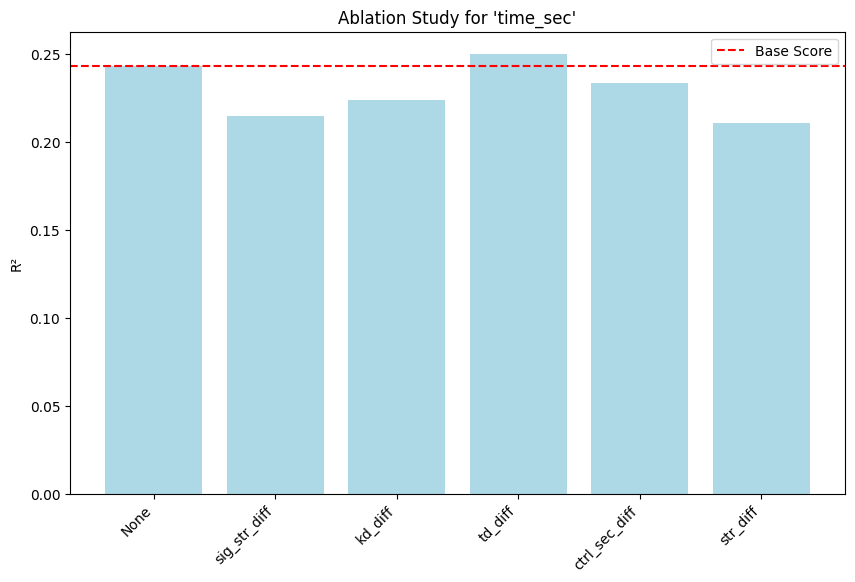

In [38]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt

def ablation_study(target, base_features, model_type='regressor', remove_features=None):
    """
    Perform ablation study by evaluating model performance when specific features are removed.

    Parameters:
    - target: str, the target variable to predict.
    - base_features: list, the full list of features to use.
    - model_type: str, 'regressor' or 'classifier'.
    - remove_features: list, features to remove one at a time for ablation.

    Returns:
    - results_df: pd.DataFrame, a DataFrame with performance metrics for each feature removed.
    """
    # drop rows with missing target values
    data = ufc_cleaned.dropna(subset=[target])

    # ensure all features are numeric
    X = data[base_features].apply(pd.to_numeric, errors='coerce')
    y = data[target]

    # drop rows with invalid or missing  data after conversion
    X = X.dropna()
    y = y[X.index]

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # initialize base model
    model = XGBRegressor(random_state=42) if model_type == 'regressor' else XGBClassifier(random_state=42)
    base_model = model.fit(X_train, y_train)
    base_pred = base_model.predict(X_test)

    # base performance
    if model_type == 'regressor':
        base_score = r2_score(y_test, base_pred)
        score_type = 'R²'
    else:
        base_score = accuracy_score(y_test, base_pred.round())
        score_type = 'Accuracy'

    print(f"Base model performance ({score_type}): {base_score:.4f}")

    # start ablation study
    results = [{'Feature Removed': 'None', 'Performance': base_score}]
    for feature in remove_features:
        print(f"Removing feature: {feature}")
        reduced_features = [f for f in base_features if f != feature]

        # subset data
        X_reduced_train = X_train[reduced_features]
        X_reduced_test = X_test[reduced_features]

        # train reduced model
        model.fit(X_reduced_train, y_train)
        reduced_pred = model.predict(X_reduced_test)

        # evaluate reduced performance
        if model_type == 'regressor':
            reduced_score = r2_score(y_test, reduced_pred)
        else:
            reduced_score = accuracy_score(y_test, reduced_pred.round())

        results.append({'Feature Removed': feature, 'Performance': reduced_score})
        print(f"Performance after removing {feature}: {reduced_score:.4f}")

    results_df = pd.DataFrame(results)
    results_df['Performance'] = results_df['Performance'].round(4)

    print("\nAblation Study Results:")
    display(results_df)

    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Feature Removed'], results_df['Performance'], color='lightblue')
    plt.axhline(y=base_score, color='r', linestyle='--', label='Base Score')
    plt.title(f"Ablation Study for '{target}'")
    plt.ylabel(score_type)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

    return results_df

#usage for time_sec since it did poorly
target = 'time_sec'
features = ['sig_str_diff', 'kd_diff', 'td_diff', 'ctrl_sec_diff', 'str_diff']
remove_features = ['sig_str_diff', 'kd_diff', 'td_diff', 'ctrl_sec_diff', 'str_diff']

# using the ablation study function for regression task
ablation_results = ablation_study(target, features, model_type='regressor', remove_features=remove_features)


In [39]:
!pip install scikit-learn==1.5.2

In [40]:
# import required libraries the XGB
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# define the grid of hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # number of boosting trees
    'max_depth': [3, 5, 7],           # maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1]  # learning rate
}

# set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,         # model to tune
    param_grid=param_grid, # grid of hyperparameters
    cv=5,                  # 5-fold cross-validation
    scoring='r2',          # r-squared score for evaluation
    verbose=1,             # show progress logs
    n_jobs=-1              # use all CPU cores for faster computation
)

# fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# extract GridSearch results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# select and rename columns for better readability
results_df = results_df[['param_n_estimators', 'param_max_depth', 'param_learning_rate',
                         'mean_test_score', 'std_test_score', 'rank_test_score']]
results_df.columns = ['n_estimators', 'max_depth', 'learning_rate',
                      'Mean R² Score', 'Std Dev R²', 'Rank']

# sort results by rank (best score first)
results_df = results_df.sort_values(by='Rank')

print("Grid Search Results:")
display(results_df.style.set_caption("Hyperparameter Tuning Results"))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid Search Results:


,n_estimators,max_depth,learning_rate,Mean R² Score,Std Dev R²,Rank
20,300,3,0.100000,0.995333,0.004500,1
19,200,3,0.100000,0.994893,0.004486,2
11,300,3,0.050000,0.994768,0.003959,3
23,300,5,0.100000,0.994674,0.005210,4
22,200,5,0.100000,0.994661,0.005211,5
21,100,5,0.100000,0.994490,0.005227,6
14,300,5,0.050000,0.994166,0.004849,7
13,200,5,0.050000,0.994024,0.004873,8
10,200,3,0.050000,0.993862,0.003628,9
18,100,3,0.100000,0.993433,0.004251,10


In [41]:
# import required libraries
from xgboost import XGBRegressor  # XGBoost model for regression tasks
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # regression evaluation metrics
import numpy as np  # for numerical operations
import pandas as pd  # for table display

# initialize the XGBoost Regressor with hyperparameters optimized through GridSearch or prior tuning
xgb_final = XGBRegressor(
    learning_rate=0.1,  # step size shrinkage to prevent overfitting
    max_depth=3,        # maximum depth of each tree
    n_estimators=300,   # number of boosting rounds (trees)
    random_state=42     # ensures reproducibility
)

# train the XGBoost model on the training data
xgb_final.fit(X_train, y_train)  # X_train: training features, y_train: training target variable

# predicting the target variable on the test data
y_pred = xgb_final.predict(X_test)  # X_test: test features, y_pred: model predictions

# evaluate the model using various regression metrics
mae = mean_absolute_error(y_test, y_pred)  # mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # mean Squared Error
rmse = np.sqrt(mse)                        # root Mean Squared Error
r2 = r2_score(y_test, y_pred)              # r-squared Score

# create a table with the performance metrics
metrics_table = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)',
               'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Value': [round(mae, 4), round(mse, 4), round(rmse, 4), round(r2, 4)]
})

print("Model Performance on Test Set:")
display(metrics_table.style.set_caption("XGBoost Model Performance").set_table_styles(
    [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]}]
))


Model Performance on Test Set:


,Metric,Value
0,Mean Absolute Error (MAE),0.017900
1,Mean Squared Error (MSE),0.003700
2,Root Mean Squared Error (RMSE),0.060700
3,R² Score,0.998300


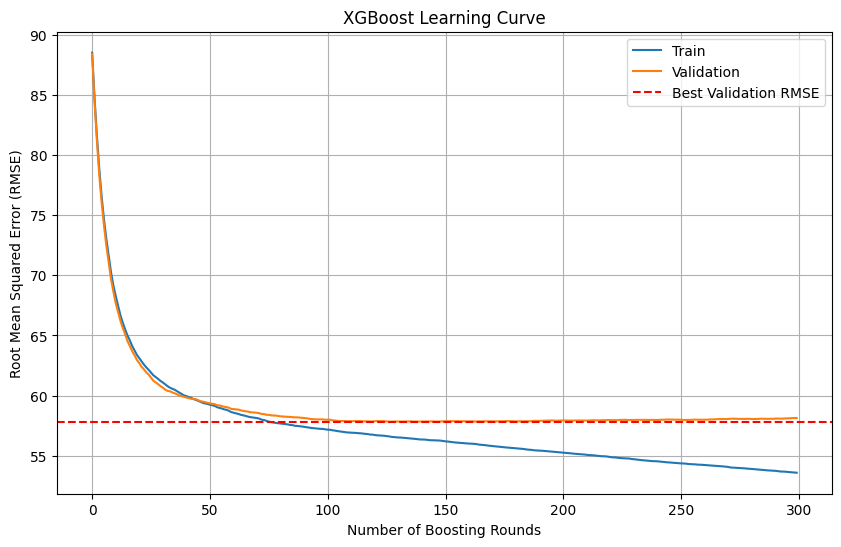

In [42]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# function to plot XGBoost learning curve
def plot_xgboost_learning_curve(X, y, model_params, test_size=0.2, random_state=42):
    """
    Trains an XGBoost model and plots the learning curve for training and validation datasets.

    Parameters:
    - X: Feature matrix
    - y: Target variable
    - model_params: Dictionary of hyperparameters for the XGBoost model
    - test_size: Proportion of the dataset to use as test set
    - random_state: Random state for reproducibility
    """
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # add eval_metric to model parameters
    model_params['eval_metric'] = 'rmse'

    # initialize the XGBoost Regressor with given hyperparameters
    model = XGBRegressor(**model_params)

    # set up evaluation datasets for training and validation
    eval_set = [(X_train, y_train), (X_test, y_test)]

    # train the model with evaluation set to track error metrics
    model.fit(X_train, y_train,
              eval_set=eval_set,
              verbose=False)  # Suppress training logs

    # extract the learning curve data
    results = model.evals_result()
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)

    # ploting the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, results['validation_0']['rmse'], label='Train')  # Training error
    plt.plot(x_axis, results['validation_1']['rmse'], label='Validation')  # Validation error
    plt.axhline(y=np.min(results['validation_1']['rmse']), color='r', linestyle='--', label='Best Validation RMSE')
    plt.xlabel('Number of Boosting Rounds')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.title('XGBoost Learning Curve')
    plt.legend()
    plt.grid()
    plt.show()

# define target and features
target = 'time_sec'
features = ['finish_round', 'b_td', 'b_str_att', 'b_str', 'r_str_att', 'r_sig_str_att', 'b_sig_str_att', 'r_td']

# prepare the data
data = ufc_cleaned.dropna(subset=[target])
X = data[features]
y = data[target]

# define XGBoost hyperparameters
xgb_params = {
    'learning_rate': 0.1,
    'n_estimators': 300,
    'max_depth': 3,
    'random_state': 42
}

# plot the learning curve
plot_xgboost_learning_curve(X, y, xgb_params)


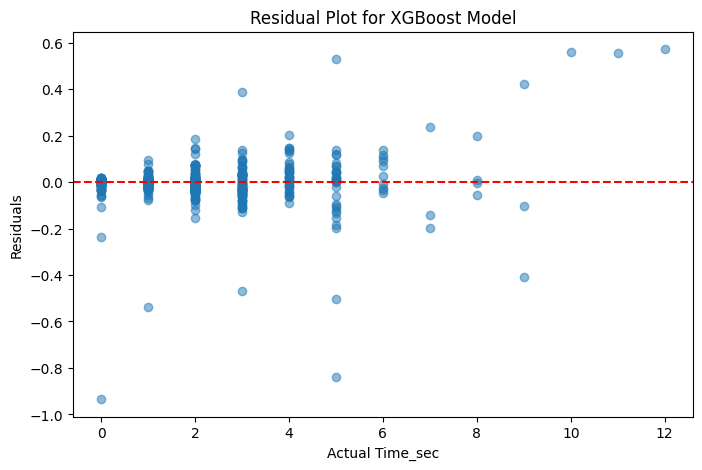

In [43]:
import matplotlib.pyplot as plt  # import Matplotlib for visualization

# calculate residuals: difference between actual and predicted values
residuals = y_test - y_pred

# create a new figure with a specified size
plt.figure(figsize=(8, 5))

# scatter plot: Actual target values (x-axis) vs Residuals (y-axis)
plt.scatter(y_test, residuals, alpha=0.5)

# add a horizontal reference line at y=0 to indicate zero residuals
plt.axhline(y=0, color='r', linestyle='--')  # Red dashed line at y=0

plt.xlabel("Actual Time_sec")

plt.ylabel("Residuals")

plt.title("Residual Plot for XGBoost Model")

plt.show()


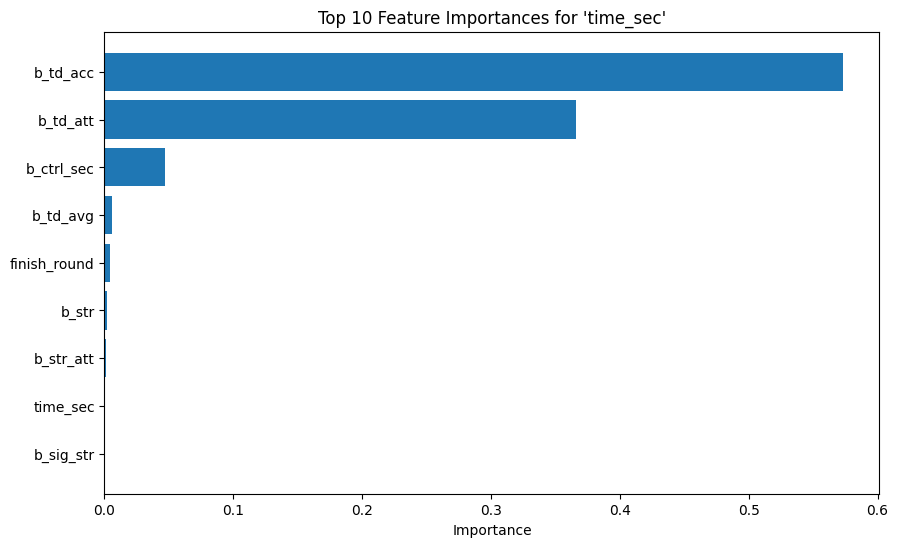

In [44]:
import pandas as pd  #import Pandas for data manipulation
import matplotlib.pyplot as plt  # import Matplotlib for visualization

# extract feature importance scores from the trained XGBoost model
feature_importance = xgb_final.feature_importances_

# create a DataFrame to associate features with their importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# sort the feature importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# create a horizontal bar plot for the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))  # plot top 10 features

# invert the y-axis so the most important feature appears at the top
plt.gca().invert_yaxis()

plt.xlabel("Importance")

plt.title("Top 10 Feature Importances for 'time_sec'")

plt.show()


In [45]:
# calculate the total number of missing (NaN) values in each column
missing_values = ufc_cleaned.isna().sum()

# filter to keep only columns with missing values (greater than 0)
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_columns)


Columns with missing values and their counts:
winner          201
method          201
finish_round    201
time_sec        201
r_sig_str       201
r_td            201
b_sig_str       201
b_td            201
sig_str_diff    201
td_diff         201
dtype: int64


In [46]:
all_predicted_values = pd.DataFrame()  # initialize an empty DataFrame to store predicted values

def train_and_predict_missing(target, features):
    """
    Trains a model to predict and fill missing values for a target column using specified features.
    Updates the cleaned dataset with predicted values and stores the results.
    """
    print(f"\nTraining model to predict '{target}' using features: {features}")
    global ufc_cleaned, all_predicted_values  # Use global variables for the cleaned dataset and predictions log

    # prepare the dataset: Drop rows where the target variable is missing
    data = ufc_cleaned.dropna(subset=[target])
    X = data[features]  # Feature matrix
    y = data[target]    # Target variable

    # check if the target is categorical (classification task)
    is_classification = target in ['winner', 'method']
    if is_classification:
        le = LabelEncoder()  # initialize LabelEncoder for categorical targets
        y = le.fit_transform(y)  # encode target labels to numeric values
        label_encoders[target] = le  # save the encoder for future decoding

    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # select the appropriate model based on the target variable
    if target == 'time_sec':
        model = XGBRegressor(learning_rate=0.1, n_estimators=300, max_depth=3, random_state=42)  # XGBoost for 'time_sec'
    elif is_classification:
        model = RandomForestClassifier(random_state=42)  # Random Forest Classifier for categorical targets
    else:
        model = RandomForestRegressor(random_state=42)  # Random Forest Regressor for numeric targets

    # train the model
    model.fit(X_train, y_train)

    # predict missing values for rows where the target is NaN
    missing_data = ufc_cleaned[ufc_cleaned[target].isnull()]
    if not missing_data.empty:
        X_missing = missing_data[features].fillna(0)  # Replace NaN in features with 0 for prediction
        predicted_values = model.predict(X_missing)

        # decode predicted values if the target is categorical
        if is_classification:
            predicted_values = le.inverse_transform(predicted_values)

        # ppdate the main DataFrame with predicted values
        ufc_cleaned.loc[ufc_cleaned[target].isnull(), target] = predicted_values
        print(f"Missing values for '{target}' have been filled.")

        # store the predicted rows in the 'all_predicted_values' DataFrame
        predicted_rows = missing_data.copy()
        predicted_rows[target] = predicted_values
        predicted_rows['target_column'] = target

        all_predicted_values = pd.concat([
            all_predicted_values,
            predicted_rows[['r_fighter', 'b_fighter', target, 'target_column']]
        ], ignore_index=True)

        # display the predicted rows
        print(f"\nPredicted values for '{target}':")
        display(predicted_rows[['r_fighter', 'b_fighter', target, 'target_column']])

# loop through each target variable and its associated features to predict and fill missing values
for target, features in target_features.items():
    train_and_predict_missing(target, features)



Training model to predict 'winner' using features: ['sig_str_diff', 'str_diff', 'sig_str_acc_diff', 'kd_diff', 'str_acc_diff', 'str_att_diff', 'td_diff', 'r_td', 'ctrl_sec_diff']
Missing values for 'winner' have been filled.

Predicted values for 'winner':


<ipython-input-46-74a21deb7b75>:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_missing = missing_data[features].fillna(0)  # Replace NaN in features with 0 for prediction


,r_fighter,b_fighter,winner,target_column
7464,Erin Blanchfield,Manon Fiorot,1.0,winner
7465,Vicente Luque,Joaquin Buckley,1.0,winner
7466,Chris Weidman,Bruno Silva,0.0,winner
7468,Bill Algeo,Kyle Nelson,1.0,winner
7469,Chidi Njokuani,Rhys McKee,1.0,winner
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,1.0,winner
7840,Joel Alvarez,Drakkar Klose,1.0,winner
7841,Sean Woodson,Fernando Padilla,0.0,winner
7843,Miranda Maverick,Jamey-Lyn Horth,1.0,winner



Training model to predict 'method' using features: ['winner', 'r_sub_avg', 'sig_str_diff', 'r_sub_att', 'td_diff', 'b_td', 'r_sig_str_acc', 'sub_att_diff', 'r_td']
Missing values for 'method' have been filled.

Predicted values for 'method':


<ipython-input-46-74a21deb7b75>:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_missing = missing_data[features].fillna(0)  # Replace NaN in features with 0 for prediction


,r_fighter,b_fighter,method,target_column
7464,Erin Blanchfield,Manon Fiorot,4.0,method
7465,Vicente Luque,Joaquin Buckley,4.0,method
7466,Chris Weidman,Bruno Silva,4.0,method
7468,Bill Algeo,Kyle Nelson,4.0,method
7469,Chidi Njokuani,Rhys McKee,4.0,method
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,4.0,method
7840,Joel Alvarez,Drakkar Klose,5.0,method
7841,Sean Woodson,Fernando Padilla,4.0,method
7843,Miranda Maverick,Jamey-Lyn Horth,4.0,method



Training model to predict 'finish_round' using features: ['r_str_att', 'b_str_att', 'b_str', 'b_sig_str_att', 'r_str', 'r_sig_str_att', 'b_td', 'r_td', 'time_sec']
Missing values for 'finish_round' have been filled.

Predicted values for 'finish_round':


,r_fighter,b_fighter,finish_round,target_column
7464,Erin Blanchfield,Manon Fiorot,2.83,finish_round
7465,Vicente Luque,Joaquin Buckley,2.38,finish_round
7466,Chris Weidman,Bruno Silva,1.84,finish_round
7468,Bill Algeo,Kyle Nelson,2.20,finish_round
7469,Chidi Njokuani,Rhys McKee,1.64,finish_round
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,1.48,finish_round
7840,Joel Alvarez,Drakkar Klose,1.08,finish_round
7841,Sean Woodson,Fernando Padilla,2.04,finish_round
7843,Miranda Maverick,Jamey-Lyn Horth,2.47,finish_round



Training model to predict 'time_sec' using features: ['finish_round', 'b_td', 'b_str_att', 'b_str', 'r_str_att', 'b_sig_str_att', 'r_td', 'r_sig_str_att', 'r_str']
Missing values for 'time_sec' have been filled.

Predicted values for 'time_sec':


,r_fighter,b_fighter,time_sec,target_column
7464,Erin Blanchfield,Manon Fiorot,293.060699,time_sec
7465,Vicente Luque,Joaquin Buckley,276.723877,time_sec
7466,Chris Weidman,Bruno Silva,190.074600,time_sec
7468,Bill Algeo,Kyle Nelson,263.400574,time_sec
7469,Chidi Njokuani,Rhys McKee,200.727386,time_sec
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,168.073898,time_sec
7840,Joel Alvarez,Drakkar Klose,115.154816,time_sec
7841,Sean Woodson,Fernando Padilla,230.117477,time_sec
7843,Miranda Maverick,Jamey-Lyn Horth,261.566467,time_sec



Training model to predict 'r_sig_str' using features: ['finish_round', 'r_str_att', 'r_sig_str_att', 'b_sig_str', 'r_str', 'b_sig_str_att', 'b_str_att', 'r_td', 'b_td']
Missing values for 'r_sig_str' have been filled.

Predicted values for 'r_sig_str':


,r_fighter,b_fighter,r_sig_str,target_column
7464,Erin Blanchfield,Manon Fiorot,59.18,r_sig_str
7465,Vicente Luque,Joaquin Buckley,79.09,r_sig_str
7466,Chris Weidman,Bruno Silva,34.69,r_sig_str
7468,Bill Algeo,Kyle Nelson,66.47,r_sig_str
7469,Chidi Njokuani,Rhys McKee,25.23,r_sig_str
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,19.60,r_sig_str
7840,Joel Alvarez,Drakkar Klose,3.55,r_sig_str
7841,Sean Woodson,Fernando Padilla,75.86,r_sig_str
7843,Miranda Maverick,Jamey-Lyn Horth,25.46,r_sig_str



Training model to predict 'r_td' using features: ['td_diff', 'r_td_att', 'r_ctrl_sec', 'ctrl_sec_diff', 'r_td_acc', 'td_att_diff', 'finish_round', 'r_td_avg', 'td_acc_diff']
Missing values for 'r_td' have been filled.

Predicted values for 'r_td':


<ipython-input-46-74a21deb7b75>:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_missing = missing_data[features].fillna(0)  # Replace NaN in features with 0 for prediction


,r_fighter,b_fighter,r_td,target_column
7464,Erin Blanchfield,Manon Fiorot,4.59,r_td
7465,Vicente Luque,Joaquin Buckley,1.00,r_td
7466,Chris Weidman,Bruno Silva,3.40,r_td
7468,Bill Algeo,Kyle Nelson,1.00,r_td
7469,Chidi Njokuani,Rhys McKee,0.00,r_td
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,1.00,r_td
7840,Joel Alvarez,Drakkar Klose,0.00,r_td
7841,Sean Woodson,Fernando Padilla,1.00,r_td
7843,Miranda Maverick,Jamey-Lyn Horth,1.00,r_td



Training model to predict 'b_sig_str' using features: ['finish_round', 'b_str_att', 'b_sig_str_att', 'b_str', 'b_td', 'r_sig_str_att', 'r_str_att', 'r_sig_str', 'b_SLpM_total']
Missing values for 'b_sig_str' have been filled.

Predicted values for 'b_sig_str':


,r_fighter,b_fighter,b_sig_str,target_column
7464,Erin Blanchfield,Manon Fiorot,94.50,b_sig_str
7465,Vicente Luque,Joaquin Buckley,69.91,b_sig_str
7466,Chris Weidman,Bruno Silva,20.64,b_sig_str
7468,Bill Algeo,Kyle Nelson,78.98,b_sig_str
7469,Chidi Njokuani,Rhys McKee,73.66,b_sig_str
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,9.73,b_sig_str
7840,Joel Alvarez,Drakkar Klose,15.80,b_sig_str
7841,Sean Woodson,Fernando Padilla,14.20,b_sig_str
7843,Miranda Maverick,Jamey-Lyn Horth,40.85,b_sig_str



Training model to predict 'b_td' using features: ['b_ctrl_sec', 'b_td_att', 'finish_round', 'b_td_acc', 'b_td_avg', 'b_str', 'time_sec', 'b_sig_str', 'b_str_att']
Missing values for 'b_td' have been filled.

Predicted values for 'b_td':


,r_fighter,b_fighter,b_td,target_column
7464,Erin Blanchfield,Manon Fiorot,1.30,b_td
7465,Vicente Luque,Joaquin Buckley,1.00,b_td
7466,Chris Weidman,Bruno Silva,1.00,b_td
7468,Bill Algeo,Kyle Nelson,0.00,b_td
7469,Chidi Njokuani,Rhys McKee,0.00,b_td
...,...,...,...,...
7839,Michael Johnson,Ottman Azaitar,0.00,b_td
7840,Joel Alvarez,Drakkar Klose,2.39,b_td
7841,Sean Woodson,Fernando Padilla,0.00,b_td
7843,Miranda Maverick,Jamey-Lyn Horth,1.00,b_td


In [ ]:
# drop the 'target_column' column if it exists in all_predicted_values
final_combined_predictions = all_predicted_values.drop(columns=['target_column'], errors='ignore')

# reshape the data using a pivot table to combine predictions for each fighter pair
final_combined_predictions = final_combined_predictions.pivot_table(
    index=['r_fighter', 'b_fighter'],  # group data by red and blue fighters
    aggfunc='first'                    # use the first non-null value for each group
).reset_index()                        # reset the index to convert it back to a DataFrame

print("Final Combined Predictions Without 'target_column':")
display(final_combined_predictions)


In [ ]:
# define a mapping for method predictions to descriptive labels
method_mapping = {
    0.0: 'DQ',                            # Disqualification
    1.0: 'Decision - Majority',           # Majority decision
    2.0: 'Decision - Split',              # Split decision
    4.0: 'Decision - Unanimous',          # Unanimous decision
    5.0: 'KO/TKO',                        # Knockout/Technical Knockout
    6.0: "TKO - Doctor's Stoppage",       # Doctor's stoppage for TKO
    3.0: 'Submission'                     # Submission victory
}

# define a mapping for winner predictions to descriptive corner labels
winner_mapping = {
    0: 'Blue Corner',                     # Blue corner fighter won
    1: 'Red Corner'                       # Red corner fighter won
}

# decode 'method' column using the method_mapping dictionary
final_combined_predictions['method'] = final_combined_predictions['method'].map(method_mapping)

# decode 'winner' column using the winner_mapping dictionary
final_combined_predictions['winner'] = final_combined_predictions['winner'].map(winner_mapping)

print("Manually Decoded Final Combined Predictions:")
display(final_combined_predictions)


In [49]:
# add a new column 'winner_fighter' with the name of the winning fighter
final_combined_predictions['winner_fighter'] = final_combined_predictions.apply(
    lambda row: row['r_fighter'] if row['winner'] == 'Red Corner' else row['b_fighter'],
    axis=1
)

# print the updated DataFrame with the 'winner_fighter' column
print("Updated Final Combined Predictions with Winner's Name:")
display(final_combined_predictions)


Updated Final Combined Predictions with Winner's Name:


,r_fighter,b_fighter,b_sig_str,b_td,finish_round,method,r_sig_str,r_td,time_sec,winner,winner_fighter
0,Adrian Yanez,Daniel Marcos,46.49,1.0,1.65,Decision - Unanimous,30.27,0.00,187.573776,Red Corner,Adrian Yanez
1,Adrian Yanez,Vinicius Salvador,77.90,1.0,1.71,Decision - Unanimous,29.16,0.00,209.285477,Red Corner,Adrian Yanez
2,Alex Caceres,Sean Woodson,82.79,1.0,2.60,Decision - Unanimous,83.01,1.00,266.243988,Red Corner,Alex Caceres
3,Alex Pereira,Jamahal Hill,165.44,0.0,2.34,Decision - Unanimous,108.38,0.00,165.843246,Red Corner,Alex Pereira
4,Alexa Grasso,Valentina Shevchenko,77.07,1.0,2.88,Decision - Unanimous,153.85,1.00,291.207123,Red Corner,Alexa Grasso
...,...,...,...,...,...,...,...,...,...,...,...
192,Vitor Petrino,Dustin Jacoby,89.05,0.0,1.81,Decision - Unanimous,26.18,2.81,193.640701,Red Corner,Vitor Petrino
193,Volkan Oezdemir,Carlos Ulberg,118.83,0.0,1.56,Decision - Unanimous,22.24,1.00,236.108627,Red Corner,Volkan Oezdemir
194,William Gomis,Joanderson Brito,10.71,1.0,1.39,KO/TKO,49.89,1.00,169.792755,Red Corner,William Gomis
195,Yana Santos,Chelsea Chandler,62.45,1.0,2.57,Decision - Unanimous,93.38,1.00,275.622620,Red Corner,Yana Santos


In [50]:
from google.colab import files  # Import the Colab file utility module
#downloading the whole dataset with all the fighters
final_combined_predictions.to_csv("final_combined_predictions.csv", index=False)

files.download("final_combined_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>